In [1]:
import pandas as pd 
import geopandas as gpd

## Création d'un fichier geojson avec les secteurs statistiques qui nous interésse pour chaque villes

In [2]:
# ouverture du fihcier avec tous les secteurs
stat = gpd.read_file("../data/sh_statbel_statistical_sectors_31370_20230101.json")

In [3]:
stat.head()

,ogc_fid,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
0,1,11001A00-,AARTSELAAR-CENTRUM,AARTSELAAR-CENTRUM,AARTSELAAR-CENTRUM,11001A,AARTSELAAR,AARTSELAAR,NaN,11001,...,Région flamande,Flämische Region,BE,BE2,BE21,BE211,53.158100,5248,2023-01-01,"POLYGON ((151660.03130 203013.60550, 151633.79..."
1,2,11001A01-,DE LEEUWERIK,DE LEEUWERIK,DE LEEUWERIK,11001A,AARTSELAAR,AARTSELAAR,NaN,11001,...,Région flamande,Flämische Region,BE,BE2,BE21,BE211,67.114679,3935,2023-01-01,"POLYGON ((151748.50010 203170.48050, 151731.56..."
2,3,11001A020,BUERSTEDE,BUERSTEDE,BUERSTEDE,11001A,AARTSELAAR,AARTSELAAR,NaN,11001,...,Région flamande,Flämische Region,BE,BE2,BE21,BE211,28.084364,2202,2023-01-01,"POLYGON ((150636.35950 202981.93370, 150638.14..."
3,4,11001A030,YSSELAAR,YSSELAAR,YSSELAAR,11001A,AARTSELAAR,AARTSELAAR,NaN,11001,...,Région flamande,Flämische Region,BE,BE2,BE21,BE211,42.811852,3403,2023-01-01,"POLYGON ((151584.54690 203829.80870, 151436.84..."
4,5,11001A042,KLEINE GRIPPE,KLEINE GRIPPE,KLEINE GRIPPE,11001A,AARTSELAAR,AARTSELAAR,NaN,11001,...,Région flamande,Flämische Region,BE,BE2,BE21,BE211,25.561955,2166,2023-01-01,"POLYGON ((151748.50010 203170.48050, 151761.09..."


In [4]:
stat.crs = "EPSG:31370"

In [5]:
stat.to_crs("EPSG:4326", inplace=True)

In [12]:
nis_code_bx = ["04000",
"21000",
"21001",
"21002",
"21003",
"21004",
"21005",
"21006",
"21007",
"21008",
"21009",
"21010",
"21011",
"21012",
"21013",
"21014",
"21015",
"21016",
"21017",
"21018",
"21019"]


(724, 33)


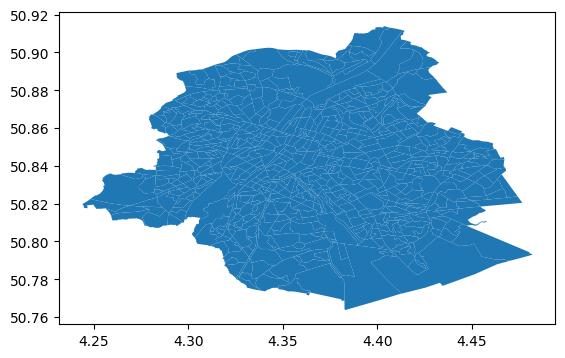

In [14]:
communes_bxl = ["Anderlecht", "Bruxelles", "Ixelles", "Etterbeek", "Evere","Ganshoren","Jette",'Koekelberg', "Auderghem", "Schaerbeek","Berchem-Sainte-Agathe","Saint-Gilles","Molenbeek-Saint-Jean","Saint-Josse-ten-Noode","Woluwe-Saint-Lambert","Woluwe-Saint-Pierre","Uccle","Forest","Watermael-Boitsfort"]
commune = pd.DataFrame()
for nis in nis_code_bx: 
    comm = stat.loc[stat["cd_munty_refnis"] == nis]
    commune = pd.concat([commune, comm], ignore_index=True)

print(commune.shape)
commune.plot(aspect=1)
commune.to_file(f"../data/secteurs/bxl_secteurs_sur.geojson", driver="GeoJSON")


In [17]:
# précision du code NIS pour chaque commune
Liege = "62063"
charleroi = "52011"
mons = "53053"
namur = "92094"
tournai = "57081"

In [18]:
# sélection des lignes où les code NIS est le bon
liege_gpd = stat.loc[stat["cd_munty_refnis"] == 62063]
charleroi_gpd = stat.loc[stat["cd_munty_refnis"] == charleroi]
mons_gpd = stat.loc[stat["cd_munty_refnis"] == mons]
namur_gpd = stat.loc[stat["cd_munty_refnis"] == namur]
tournai_gpd = stat.loc[stat["cd_munty_refnis"] == tournai]

liege_gpd.head()

,ogc_fid,cd_sector,tx_sector_descr_nl,tx_sector_descr_fr,tx_sector_descr_de,cd_sub_munty,tx_sub_munty_nl,tx_sub_munty_fr,tx_munty_dstr,cd_munty_refnis,...,tx_rgn_descr_fr,tx_rgn_descr_de,cd_country,cd_nuts_lvl1,cd_nuts_lvl2,cd_nuts_lvl3,ms_area_ha,ms_perimeter_m,dt_situation,geometry
13167,13168,62063A00-,SAINT-LAMBERT,SAINT-LAMBERT,SAINT-LAMBERT,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,28.876176,2437,2023-01-01,"POLYGON ((5.58060 50.64490, 5.58012 50.64558, ..."
13168,13169,62063A01-,FERONSTREE,FERONSTREE,FERONSTREE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,31.657573,2734,2023-01-01,"POLYGON ((5.58564 50.64639, 5.58536 50.64699, ..."
13169,13170,62063A02-,PIERREUSE,PIERREUSE,PIERREUSE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,13.837131,1660,2023-01-01,"POLYGON ((5.57407 50.65149, 5.57366 50.65170, ..."
13170,13171,62063A03-,SAINT-JEAN,SAINT-JEAN,SAINT-JEAN,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,20.308784,1862,2023-01-01,"POLYGON ((5.57443 50.64240, 5.57290 50.64293, ..."
13171,13172,62063A04-,CATHEDRALE,CATHEDRALE,CATHEDRALE,62063A,"LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...","LIEGE(MEUSE NORD) + PARTIE DE HERSTAL,SAINT-NI...",NaN,62063,...,Région wallonne,Wallonische Region,BE,BE3,BE33,BE332,19.893647,1982,2023-01-01,"POLYGON ((5.57790 50.64115, 5.57589 50.64184, ..."


In [ ]:
from geojson_rewind import rewind

test = rewind(tournai_gpd)
test

In [28]:
# export des fichier geojson pour chaque ville
liege_gpd.to_file("../data/secteurs/liege_secteur.geojson", driver="GeoJSON")
charleroi_gpd.to_file("../data/secteurs/charleroi_secteur.geojson", driver="GeoJSON")
mons_gpd.to_file("../data/secteurs/mons_secteur.geojson", driver="GeoJSON")
namur_gpd.to_file("../data/secteurs/namur_secteur.geojson", driver="GeoJSON")
tournai_gpd.to_file("../data/secteurs/tournai_secteur.geojson", driver="GeoJSON")


## Tentive de sélection du polygone de chaque communes

In [50]:
commune = gpd.read_file("communes-belges0.geojson")
commune.head()

,geo_point_2d,name,nsi,geometry
0,"{'lon': 4.2140370807192635, 'lat': 50.90781434...",Asse,23002,"POLYGON ((4.27647 50.91351, 4.27660 50.91343, ..."
1,"{'lon': 3.7010804599592917, 'lat': 50.39641452...",Quiévrain,53068,"POLYGON ((3.72653 50.41375, 3.72649 50.41355, ..."
2,"{'lon': 4.991769693865529, 'lat': 50.375979515...",Assesse,92006,"POLYGON ((5.09586 50.37373, 5.09561 50.37364, ..."
3,"{'lon': 3.3060754232716474, 'lat': 50.86441399...",Harelbeke,34013,"POLYGON ((3.31253 50.90557, 3.31251 50.90552, ..."
4,"{'lon': 3.228999226497107, 'lat': 51.119904631...",Oostkamp,31022,"POLYGON ((3.27195 51.17997, 3.27223 51.17981, ..."


In [59]:
liege_comm = commune.loc[commune["name"] == "Liège"]
charleroi_comm = commune.loc[commune["name"] == "Charleroi"]
mons_comm = commune.loc[commune["name"] == "Mons"]
namur_comm = commune.loc[commune["name"] =="Namur"]
tournai_comm = commune.loc[commune["name"] == "Tournai"]


,geo_point_2d,name,nsi,geometry
226,"{'lon': 5.589386263843088, 'lat': 50.632501348...",Liège,62063,"POLYGON ((5.56345 50.68276, 5.56351 50.68269, ..."


In [54]:
liege_comm.to_file("./commune/liege_commune.geojson", driver="GeoJSON")
charleroi_comm.to_file("./commune/charleroi_commune.geojson", driver="GeoJSON")
mons_comm.to_file("./commune/mons_commune.geojson", driver="GeoJSON")
namur_comm.to_file("./commune/namur_commune.geojson", driver="GeoJSON")
tournai_comm.to_file("./commune/tournai_commune.geojson", driver="GeoJSON")

C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\io\file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\io\file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)
C:\Users\Décrypte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\io\file.py:572: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, fil